# <font color=navy> 2. 베이지안 프레임워크와 확률 </font>

## 2.1 베이즈 정리 (Bayes' Theorem) 
### 조건부 확률 

\begin{align}
 P( X|A ) &=   \frac{P(X\cap A)}{P(A)} 
\end{align}


#### Example: 공장과 불량률
3개 공장에서 제품을 생산하는데, 각 공장 1일 생산량은 A공장 100단위, B공장 50단위, C공장 80단위 이다. 1일 생산량 중 평균적으로 A공장에서 3개, B공장에서 1개, C공장에서 2개의 불량제품이 생산되었다. 
- 전체 공장의 불량율은?
- A 공장의 불량율은?


### 베이즈 정리 
사상 $A_1, A_2, \cdots, A_n$이 표본공간 $S$의 분할이며 $P(A_i)>0, P(X)>0$이면 다음의 관계식이 성립한다. 

$$ P(A_k|X) = \frac{P(A_k \cap X)}{P(X)} = \frac{P(A_k) P(X|A_k)}{\sum_{i=1}^n P(A_i) P(X|A_i)}  \propto P(A_k) P(X|A_k) $$ 

- $P(A_k)$: $A_k$의 사전 확률 (prior probability)
- $P(A_k|X)$: X가 주어질 때 $A_k$의 사후확률 (posterior probability)
- $P(X|A_k)$: $A_k$가 주어질 때 X의 우도 (likelihood)
- $P(X)$: X가 발생할 확률 - normalizing constant

#### Example: 공장과 불량률
3개 공장에서 제품을 생산하는데, 각 공장 1일 생산량은 제1공장 100단위, 제2공장 50단위, 제3공장 80단위 이다. 제품 불량률은 제1공장 3%, 제2공장 2.5%, 제3공장 2.1%로 조사되었다. 임의의 제품이 불량품으로 판정되었다. 그 불량품이 제1공장에서 생산된 제품일 확률은 얼마인가?


X: 불량이 발생하는 사건 

| $A_i$             |        $A_1$       |        $A_2$       |        $A_3$       |
|-------------------|:--------------:|:--------------:|:--------------:|
| $P(A_i)$          | $~~~~~~~~~~~~$ | $~~~~~~~~~~~~$ | $~~~~~~~~~~~~$ |
| $P(X\vert A_i)$       |                |                |                |
| $P(A_i)P(X\vert A_i)$ |                |                |                |
| $P(A_i\vert X)$      |                |                |                |

#### Example: 매장 추정
A매장에서는 x제품과 y제품의 매출비중이 6:4이며, B매장에서는 x제품과 y제품의 매출비중이 3:7이라 한다. A매장과 B매장의 매출비중은 4:6이다. 임의의 x제품이 A매장의 물건일 확률은?

<br><br><br><br><br><br><br><br>

#### 확률밀도함수(혹은 확률질량함수)로 표현한 베이즈 정리
<br>
$$ p(\theta|y) = \frac{p(y|\theta)\pi(\theta)}{p(y)} \propto p(y|\theta)\pi(\theta) $$

- $\theta$: frequentist 방법에서 주로 추정의 대상이 되는 모수 
    - 정규분포의 $\mu, \sigma^2$, 이항분포의 $p$ 등 
- $y$: 관측된 데이터 
- $\pi(\theta)$: $\theta$의 사전분포
- $p(y|\theta)$: y의 우도함수 
- $p(\theta|y)$: $\theta$의 사후분포  

## 2.2 Example: 동전 던지기 

- 동전의 앞면이 나올 확률을 $\theta$라고 하자. $\theta$가 무엇인지 아무 정보가 없다고 가정한다. (즉, 0과 1사이의 무작위 수일 것이라고 믿음) 
- 동전을 두번 던졌는데 두번 다 앞면이 나왔다. 그렇다면 $\theta$ 값에 대한 믿음을 어떻게 변화했을까? 

    - $\pi(\theta) = 1, 0\leq \theta \leq 1$
    - 관측치: 2번 시행(n=2) 중 2번 앞면(y=2)이 나옴
    - $p(y|\theta) \propto \theta^y (1-\theta)^{n-y}$ 
    - $p(\theta|y) \propto \theta^{y} (1-\theta)^{n-y} \propto Beta(y+1, n-y+1) $ <font color=green> (why? 뒤에서 따로 설명) 


- 모형을 다시 표현하자면 아래와 같다.
$$ \theta \sim Unif(0,1) $$
$$ y|\theta \sim Bin(n,\theta) $$
$$ \Rightarrow \theta |y \sim Beta(y+1, n-y+1) $$

##### 실험: 두 번 던져서 앞면이 두번 나온 경우 

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(5,3)
import scipy.stats as stats

dist = stats.beta # posterior density 
n_trial = 2 # 2번 시행 
np.random.seed(seed=0) # random seed 고정
data = stats.bernoulli.rvs(0.5, size=n_trial) # Bernoulli(0.5)에서 random number 추출
print(data)

[1 1]


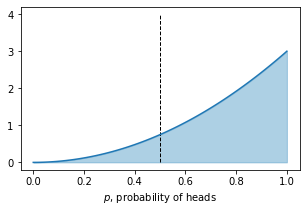

In [2]:
x = np.linspace(0, 1, 100)
heads = data.sum() # 앞면의 개수 
y = dist.pdf(x, 1 + heads, 1 + n_trial - heads) # 데이터를 사용하여 posterior density 계산 


plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
plt.xlabel("$p$, probability of heads") 
plt.show()

- 앞면이 2번 연속 발생하니 동전 앞면이 나올 확률(p)에 대한 믿음이 1로 매우 치우쳐짐

##### 동전을 던지는 시행 횟수를 늘리면 어떻게 될까? 

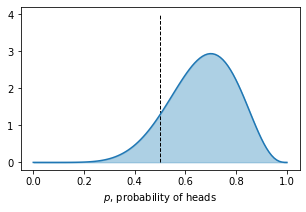

In [3]:
n_trial = 10
np.random.seed(seed=0) # random seed 고정
data = stats.bernoulli.rvs(0.5, size=n_trial) # Bernoulli(0.5)에서 random number 추출

x = np.linspace(0, 1, 100)
heads = data.sum() # 앞면의 개수 
y = dist.pdf(x, 1 + heads, 1 + n_trial - heads) # 데이터를 사용하여 posterior density 계산 


plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
plt.xlabel("$p$, probability of heads") 
plt.show()

In [4]:
data

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

- 시행 수를 늘리니 실제 데이터가 추출된 베르누이 분포의 모수값인 0.5에 보다 가까이 분포하는 사후분포를 얻음 

##### 사전정보가 있다면? 
- 만일 $\theta$에 대한 사전 정보가 전혀 없는 것이 아니고(즉, $\pi(\theta)=1$이 아니고) 0.5 근처일 것이라는 사전 정보가 있다면?
    - $\pi(\theta) \propto \theta (1-\theta), 0\leq \theta \leq 1$
        - $\theta \sim Beta(2,2)$ 
        - 왜 하필이면 Beta(2,2)?
    - $p(y|\theta) \propto \theta^y (1-\theta)^{n-y}$ 
    - $p(\theta|y) \propto \theta^{y+1} (1-\theta)^{n-y+1} \propto Beta(y+2, n-y+2) $

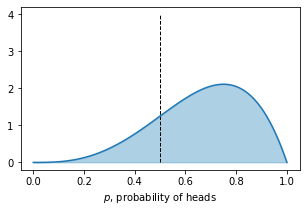

In [5]:
n_trial = 2
np.random.seed(seed=0) # random seed 고정
data = stats.bernoulli.rvs(0.5, size=n_trial) # Bernoulli(0.5)에서 random number 추출

x = np.linspace(0, 1, 100)
heads = data.sum() # 앞면의 개수 
y = dist.pdf(x, 2 + heads, 2 + n_trial - heads) # 데이터를 사용하여 posterior density 계산 

plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n_trial, heads))
plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
plt.xlabel("$p$, probability of heads") 
plt.show()

In [6]:
data

array([1, 1])

- 위에서 균등분포의 사전확률을 가질 때에 비하여 0.5에 가까운 값을 더 가지는 사후분포로 업데이트 됨

##### 시행 수가 증가함에 따라 사후분포는 어떻게 달라질까? 
<img src='http://drive.google.com/uc?export=view&id=11ndlK5J8hsBqz_gOmSMTxW10TqPZFk1m' /><br>

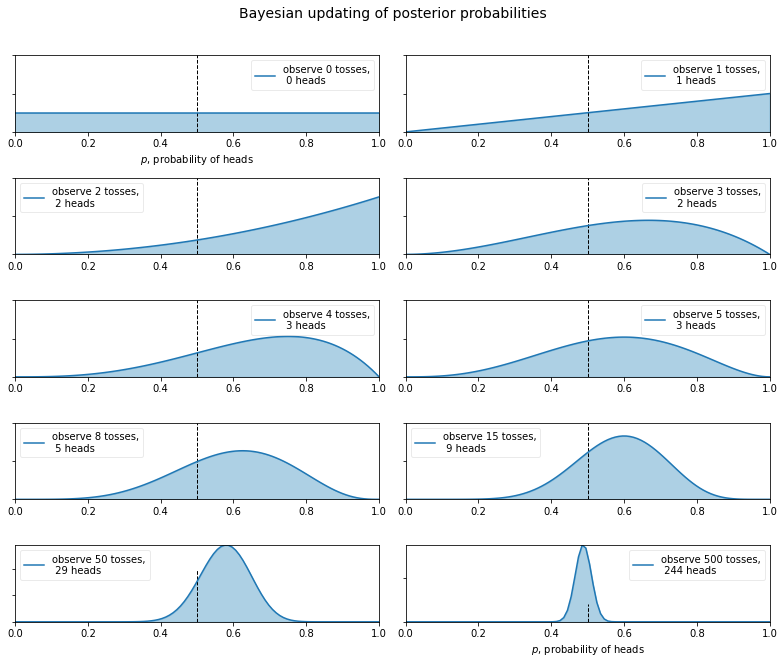

In [7]:
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)
figsize(11,9)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

- n이 커질 수록 사후 확률이 0.5 주변에 점점 가까워짐
- 곡선의 너비가 넓을 수록 불확실성이 커짐
- 곡선이 언제나 0.5를 중심으로 하고 있는 것은 아님

### Frequentist vs. Bayesian
동전을 5번 던져서 3번 앞면이 나왔다고 하자.
- Frequentist
    - 앞면이 나올 확률을 3/5로 추정 
- Bayesian 
    - 사후분포가 Beta(4, 3)
    - 사후분포에서 랜덤 샘플을 추출하여 그 평균과 분산, 혹은 중위수 등으로 추론 
    

<font color=green > **Q: 만일 사후분포를 위의 예와 같이 쉽게 구할 수 없는 문제라면 어떻게 할 것인가?**

## 2.3 Example: 문자메세지 데이터

어느 사용자가 매일 주고받은 문자 메세지를 수집하여 매일 수신한 문자 메세지 개수를 기록하였다. 이 데이터를 바탕으로 사용자의 메세지 습관이 시간의 흐름에 따라 서서히 변하는지 갑자기 급변하는지 알고 싶다. 

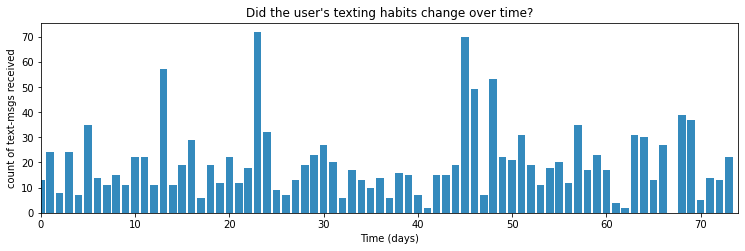

In [8]:
figsize(12.5, 3.5)
count_data = np.loadtxt("../datasets/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

In [9]:
count_data

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

### 모형 설정  
- $C_i$: 일자 $i$의 문자 메세지 개수 
$$C_i \sim Poi(\lambda)$$

    - 포아송 분포에서 $\lambda$는 평균
<br><br>
- 관측기간 중 특정 시점에  $\lambda$가 증가하는가?
    - 변환점을 $\tau$라고 하고 모형 설정 
$$\lambda = \left\{
\begin{matrix}
\lambda_1 & \mbox{if } t<\tau\\
\lambda_2 & \mbox{if } t\geq\tau\\
\end{matrix}
\right. $$ 
    - 관측시점이 $\tau$인 날을 기점으로 평균값이 변하도록 모형을 설정 

- $\lambda$의 사전확률분포를 지수분포로 설정 

    \begin{align}
    &\lambda_1 \sim \text{Exp}( \alpha ) \\\
    &\lambda_2 \sim \text{Exp}( \alpha )
    \end{align}
    - 왜 지수분포로 설정하는가?
        - 임의의 양수 값을 가지는 $\lambda$에 대해 적절한 분포
        - 지수분포의 모수인 $\alpha$를 **hyperparameter**라고 함 
        - $\alpha$를 추정하는데 우리는 관심을 두지 않으므로 평균 문자 수가 $1/\alpha$가 되도록 설정 
        <font color=green> (why? 지수분포와 포아송 분포의 관계) </font>
    
        $$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

- $\tau$의 사전분포를 이산균일분포로 설정
    - 우리는 평균 문자 수가 변하는 시점이 발생하는지에 대한 사전정보가 없으므로 데이터의 범위에서 언제라도 발생할 수 있다는 믿음을 가진 것으로 생각 
\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

### PyMC를 사용한 모수에 대한 추론 

- 관측된 데이터 $C_1, C_2, \ldots, C_N$가 위의 모형에서 나왔다고 할 때 $\tau, \lambda_1, \lambda_2$가 어떤 값일 가능성이 높을까? 즉, 세 모수의 사후분포는 어떤 모양일까? 
- 미적분을 사용하여 수학적으로 계산해내는 대신 PyMC3 모듈을 사용하여 Markov Chain Monte Carlo(MCMC) 방법으로 **확률변수**  $\tau, \lambda_1, \lambda_2$의 값을 추출하여 추론 
- 아래의 내용은 나중에 자세히 설명

In [10]:
# !pip install pymc3

# 모델을 구성
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
    

with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
### 모델에서 랜덤샘플을 추출
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

<ipython-input-11-ed758cf1908a>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, tune=5000,step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 868 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [12]:
trace['lambda_1'].shape

(40000,)

In [13]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [14]:
lambda_1_samples.shape, lambda_2_samples.shape, tau_samples.shape

((40000,), (40000,), (40000,))

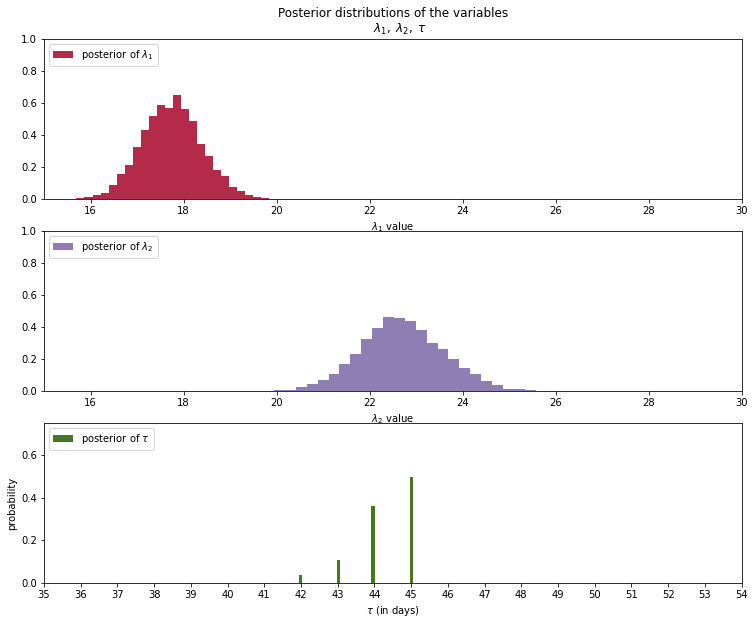

In [15]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

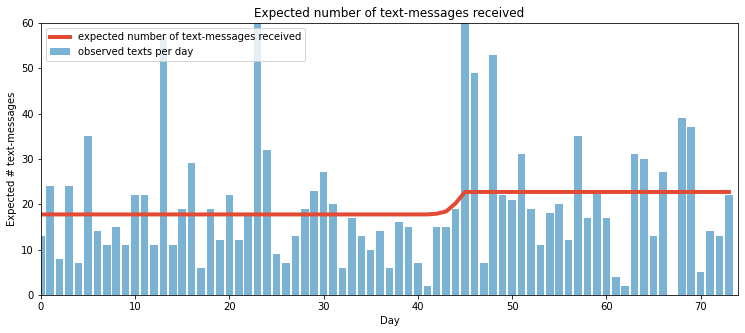

In [16]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");